In [1]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 解决中文乱码问题（mac系统）

In [2]:
# 文件路径
filePath = sys.path[0]

# 导入数据
df_train1 = pd.read_csv(filePath + os.sep + 'datasets' + os.sep + 'train_format1.csv', encoding='ISO-8859-1')
df_train2 = pd.read_csv(filePath + os.sep + 'datasets' + os.sep + 'train_format2.csv', encoding='ISO-8859-1')
df_test1 = pd.read_csv(filePath + os.sep + 'datasets' + os.sep + 'test_format1.csv', encoding='ISO-8859-1')
df_test2 = pd.read_csv(filePath + os.sep + 'datasets' + os.sep + 'test_format2.csv', encoding='ISO-8859-1')
df_user_info = pd.read_csv(filePath + os.sep + 'datasets' + os.sep + 'user_info_format1.csv', encoding='ISO-8859-1')
df_user_log = pd.read_csv(filePath + os.sep + 'datasets' + os.sep + 'user_log_format1.csv', encoding='ISO-8859-1')

In [22]:
# 查看数据规模
# print('----------数据集规模-------------')
print('df_train1 shape: ', df_train1.shape, df_train1.columns)
print('df_train2 shape: ', df_train2.shape, df_train2.columns)
print('df_test1 shape: ', df_test1.shape, df_test1.columns)
print('df_test2 shape: ', df_test2.shape, df_test2.columns)
# print('df_user_info shape: ', df_user_info.shape, df_user_info.columns)
# print('df_user_log shape: ', df_user_log.shape, df_user_log.columns)

# 查看数据大体情况
# print('-----------数据集字段-------------')
# print('df_train1 head: \n', df_train1.head())
# print('df_train2 head: \n', df_train2.head())
# print('df_test1 head: \n', df_test1.head())
# print('df_test2 head: \n', df_test2.head())
# print('df_user_info head: \n', df_user_info.head())
# print('df_user_log head: \n', df_user_log.head())

# 查看是否有缺失值
# print(df_train1.info(verbose=True,null_counts=True))
# print(df_train2.info(verbose=True,null_counts=True))
# print(df_test1.info(verbose=True,null_counts=True))
# print(df_test2.info(verbose=True,null_counts=True))
# print(df_user_info.info(verbose=True,null_counts=True))
# print(df_user_log.info(verbose=True,null_counts=True))

df_train1 shape:  (260864, 10) Index(['user_id', 'merchant_id', 'label', 'age_range', 'gender', 'total_logs',
       'unique_item_ids', 'categories', 'browse_days_x', 'browse_days_y'],
      dtype='object')
df_train2 shape:  (7030723, 6) Index(['user_id', 'age_range', 'gender', 'merchant_id', 'label',
       'activity_log'],
      dtype='object')
df_test1 shape:  (261477, 3) Index(['user_id', 'merchant_id', 'prob'], dtype='object')
df_test2 shape:  (7027943, 6) Index(['user_id', 'age_range', 'gender', 'merchant_id', 'label',
       'activity_log'],
      dtype='object')


In [34]:
# 异常值处理
df_user_info['age_range'].replace(0.0,np.nan,inplace=True)
df_user_info['gender'].replace(2.0,np.nan,inplace=True)
df_user_info['age_range'].replace(np.nan,-1,inplace=True)
df_user_info['gender'].replace(np.nan,-1,inplace=True)
print(df_user_info.info(verbose=True,null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
user_id      424170 non-null int64
age_range    424170 non-null float64
gender       424170 non-null float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB
None


Text(0.5, 1.0, '用户年龄分布')

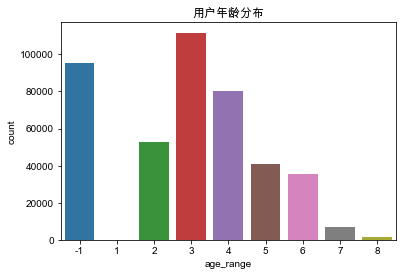

In [37]:
# -1表示未知；<18岁为1；[18,24]为2； [25,29]为3； [30,34]为4；[35,39]为5；[40,49]为6； >= 50时为7和8
sns.countplot(x = 'age_range', order = [-1,1,2,3,4,5,6,7,8], data = df_user_info)
plt.title('用户年龄分布')

Text(0.5, 1.0, '用户性别分布')

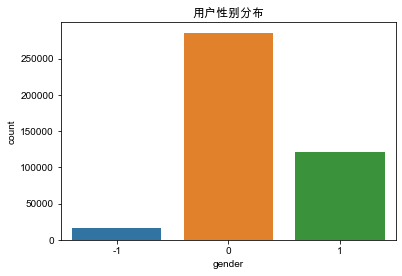

In [38]:
# 用户性别。0表示女性，1表示男性，-1表示未知
sns.countplot(x='gender',order = [-1,0,1],data = df_user_info)
plt.title('用户性别分布')

Text(0.5, 1.0, '用户性别年龄分布')

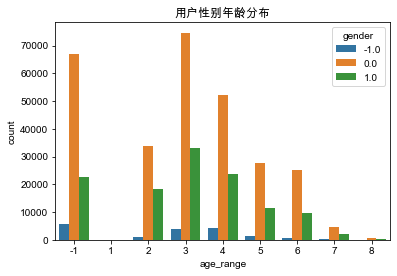

In [40]:
sns.countplot(x = 'age_range', order = [-1,1,2,3,4,5,6,7,8],hue= 'gender',data = df_user_info)
plt.title('用户性别年龄分布')

In [43]:
df_user_log.isnull().sum(axis=0)  # 查看缺失值
df_user_log = df_user_log.dropna()  # 删除具有缺失值的列
print(df_user_log.info(verbose=True,null_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54834315 entries, 0 to 54925329
Data columns (total 7 columns):
user_id        54834315 non-null int64
item_id        54834315 non-null int64
cat_id         54834315 non-null int64
seller_id      54834315 non-null int64
brand_id       54834315 non-null float64
time_stamp     54834315 non-null int64
action_type    54834315 non-null int64
dtypes: float64(1), int64(6)
memory usage: 3.3 GB
None


   user_id  item_id  cat_id  seller_id  brand_id  time_stamp  action_type
0   328862   323294     833       2882    2661.0         829            0
1   328862   844400    1271       2882    2661.0         829            0
2   328862   575153    1271       2882    2661.0         829            0
3   328862   996875    1271       2882    2661.0         829            0
4   328862  1086186    1271       1253    1049.0         829            0


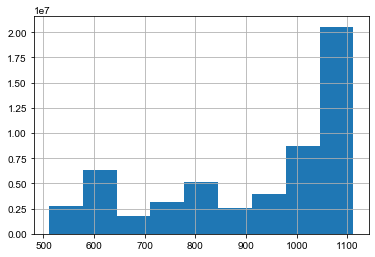

In [45]:
# 用户购买行为数量随时间的分布
df_user_log['time_stamp'].hist(bins = 9)

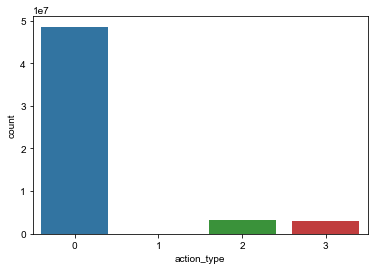

In [46]:
# 观察用户购买相关的行为
# 包含{0, 1, 2, 3}，0表示单击，1表示添加到购物车，2表示购买，3表示添加到收藏夹
sns.countplot(x = 'action_type', order = [0,1,2,3],data = df_user_log)

In [7]:
# age_range, gender特征添加
df_train1 = pd.merge(df_train1, df_user_info, on="user_id", how="left")
df_train1.head()

,user_id,merchant_id,label,age_range,gender
0,34176,3906,0,6.0,0.0
1,34176,121,0,6.0,0.0
2,34176,4356,1,6.0,0.0
3,34176,2217,0,6.0,0.0
4,230784,4818,0,0.0,0.0


In [9]:
# total_logs特征添加
total_logs_temp = df_user_log.groupby([df_user_log["user_id"], df_user_log["seller_id"]]).count().reset_index()[["user_id","seller_id","item_id"]]
total_logs_temp.rename(columns={"seller_id":"merchant_id", "item_id":"total_logs"}, inplace=True)
df_train1 = pd.merge(df_train1, total_logs_temp, on=["user_id","merchant_id"], how="left")
df_train1.head()

,user_id,merchant_id,label,age_range,gender,total_logs
0,34176,3906,0,6.0,0.0,39
1,34176,121,0,6.0,0.0,14
2,34176,4356,1,6.0,0.0,18
3,34176,2217,0,6.0,0.0,2
4,230784,4818,0,0.0,0.0,8


In [10]:
# unique_item_ids特征添加
unique_item_ids_temp = df_user_log.groupby([df_user_log["user_id"], df_user_log["seller_id"], df_user_log["item_id"]]).count().reset_index()[["user_id", "seller_id", "item_id"]]
unique_item_ids_temp1 = unique_item_ids_temp.groupby([unique_item_ids_temp["user_id"], unique_item_ids_temp["seller_id"]]).count().reset_index()
unique_item_ids_temp1.rename(columns={"seller_id":"merchant_id","item_id":"unique_item_ids"}, inplace=True)
df_train1 = pd.merge(df_train1, unique_item_ids_temp1, on=["user_id","merchant_id"], how="left")
df_train1.head()

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids
0,34176,3906,0,6.0,0.0,39,20
1,34176,121,0,6.0,0.0,14,1
2,34176,4356,1,6.0,0.0,18,2
3,34176,2217,0,6.0,0.0,2,1
4,230784,4818,0,0.0,0.0,8,1


In [11]:
# categories特征构建
categories_temp = df_user_log.groupby([df_user_log["user_id"], df_user_log["seller_id"], df_user_log["cat_id"]]).count().reset_index()[["user_id","seller_id","cat_id"]]
categories_temp1 = categories_temp.groupby([categories_temp["user_id"], categories_temp["seller_id"]]).count().reset_index()
categories_temp1.rename(columns={"seller_id":"merchant_id", "cat_id":"categories"}, inplace=True)
df_train1 = pd.merge(df_train1, categories_temp1, on=["user_id","merchant_id"], how="left")
df_train1.head()

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories
0,34176,3906,0,6.0,0.0,39,20,6
1,34176,121,0,6.0,0.0,14,1,1
2,34176,4356,1,6.0,0.0,18,2,1
3,34176,2217,0,6.0,0.0,2,1,1
4,230784,4818,0,0.0,0.0,8,1,1


In [13]:
# browse_days特征构建
browse_days_temp = df_user_log.groupby([df_user_log["user_id"], df_user_log["seller_id"], df_user_log["time_stamp"]]).count().reset_index()[["user_id","seller_id","time_stamp"]]
browse_days_temp1 = browse_days_temp.groupby([browse_days_temp["user_id"], browse_days_temp["seller_id"]]).count().reset_index()
browse_days_temp1.rename(columns={"seller_id":"merchant_id", "time_stamp":"browse_days"}, inplace=True)
df_train1 = pd.merge(df_train1, browse_days_temp1, on=["user_id","merchant_id"], how="left")
df_train1.head()

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories,browse_days_x,browse_days_y
0,34176,3906,0,6.0,0.0,39,20,6,9,9
1,34176,121,0,6.0,0.0,14,1,1,3,3
2,34176,4356,1,6.0,0.0,18,2,1,2,2
3,34176,2217,0,6.0,0.0,2,1,1,1,1
4,230784,4818,0,0.0,0.0,8,1,1,3,3


In [20]:
# one_clicks、shopping_carts、purchase_times、favourite_times特征构建
one_clicks_temp = df_user_log.groupby([df_user_log["user_id"], df_user_log["seller_id"], df_user_log["action_type"]]).count().reset_index()[["user_id","seller_id","action_type","item_id"]]
one_clicks_temp.rename(columns={"seller_id":"merchant_id","item_id":"times"},inplace=True)
one_clicks_temp["one_clicks"] = one_clicks_temp["action_type"] == 0
one_clicks_temp["one_clicks"] = one_clicks_temp["one_clicks"] * one_clicks_temp["times"]
one_clicks_temp["shopping_carts"] = one_clicks_temp["action_type"] == 1
one_clicks_temp["shopping_carts"] = one_clicks_temp["shopping_carts"] * one_clicks_temp["times"]
one_clicks_temp["purchase_times"] = one_clicks_temp["action_type"] == 2
one_clicks_temp["purchase_times"] = one_clicks_temp["purchase_times"] * one_clicks_temp["times"]
one_clicks_temp["favourite_times"] = one_clicks_temp["action_type"] == 3
one_clicks_temp["favourite_times"] = one_clicks_temp["favourite_times"] * one_clicks_temp["times"]
one_clicks_temp.head()


,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times,favourite_times
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,0,3,3,0,0,0
3,1,925,2,1,0,0,1,0
4,1,1019,0,10,10,0,0,0


In [21]:
four_features = one_clicks_temp.groupby([one_clicks_temp["user_id"], one_clicks_temp["merchant_id"]]).sum().reset_index()
four_features = four_features.drop(["action_type", "times"], axis=1)
df_train1 = pd.merge(df_train1, four_features, on=["user_id","merchant_id"], how="left")
df_train1.head()

ValueError: cannot insert merchant_id, already exists

In [ ]:
df_train1.isnull().sum(axis=0)
df_train1 = df_train1.fillna(method='ffill')  # 缺失值向前填充
print(df_train1.info(verbose=True,null_counts=True))